In [14]:
import uproot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

In [15]:
class BranchJet:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Jet.PT"].array())
        self.PT = file["Jet.PT"].array()
        self.Eta =  file["Jet.Eta"].array()
        self.Phi = file["Jet.Phi"].array()
        self.Mass = file["Jet.Mass"].array()
        self.BTag = file["Jet.BTag"].array()
   
    def BTag_At(self, i):
        return self.BTag[i]        
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    def y_At(self, i):
        pT=self.PT[i]
        eta=self.Eta[i]
        pz=pT*np.sinh(eta)
        m=self.Mass[i]
        E=np.sqrt(m*m+pz*pz+pT*pT)
        
        return np.log((E+pz)/np.sqrt(m*m+pT*pT))


In [16]:
def P4(pt,eta,phi,m):
    px, py, pz = pt*np.cos(phi), pt*np.sin(phi),pt*np.sinh(eta)
    e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    
    return np.array([e,px,py,pz])

In [17]:
def M(P4):
    
    return np.sqrt((P4[0])**2-(P4[1])**2-(P4[2])**2-(P4[3])**2)

In [49]:
list=["hww","pp4j","pptt","ppww","ppzz"]
dict_M_4j = {}
dict_PT_led = {}
dict_PT_sub = {}
for j in list:
    filepath = "./{}_r08.root".format(j)
    file = uproot.open(filepath)["Delphes;1"]
    Jet = BranchJet(file)
    
    M_4j=[]
    for i in range(Jet.length):
        if len(Jet.PT_At(i)) < 4:
            continue
        P4_0=P4(Jet.PT[i][0],Jet.Eta[i][0],Jet.Phi[i][0],Jet.Mass[i][0])
        P4_1=P4(Jet.PT[i][1],Jet.Eta[i][1],Jet.Phi[i][1],Jet.Mass[i][1])
        P4_2=P4(Jet.PT[i][2],Jet.Eta[i][2],Jet.Phi[i][2],Jet.Mass[i][2])
        P4_3=P4(Jet.PT[i][3],Jet.Eta[i][3],Jet.Phi[i][3],Jet.Mass[i][3])
        P4_total=P4_0+P4_1+P4_2+P4_3
        M_4j.append(M(P4_total))
    PT_led=[]
    PT_sub=[]
    for i in range(Jet.length):
        if len(Jet.PT_At(i)) < 4:
            continue
        PT_led.append(Jet.PT[i][0])
        PT_sub.append(Jet.PT[i][1])
    print(j)
    dict_M_4j[j] = M_4j
    dict_PT_led[j] = PT_led
    dict_PT_sub[j] = PT_sub

hww
pp4j
pptt
ppww
ppzz


green
red
cyan
blue
yellow


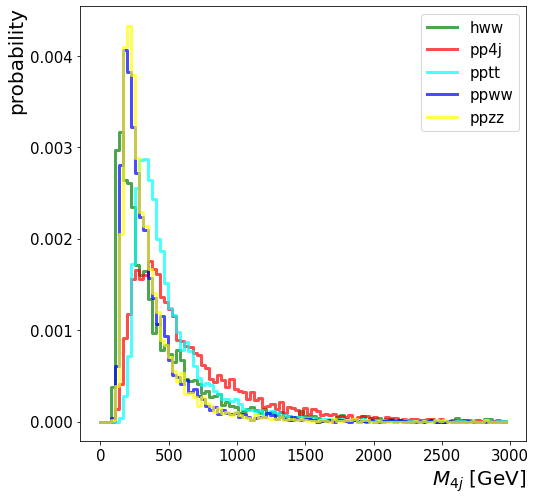

In [53]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,3000,101)

color_list = ["green","red","cyan","blue","yellow"]

for i in range(len(list)):
    hist_ggh, bins_ggh = np.histogram(dict_M_4j[list[i]] , bins=bin_size,density=True)
    print(color_list[i])
    plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = color_list[i], where='mid',linewidth=3, alpha=0.7,label=list[i]) 

# plt.yscale('log') 
plt.xlabel("$M_{4j}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

green
red
cyan
blue
yellow


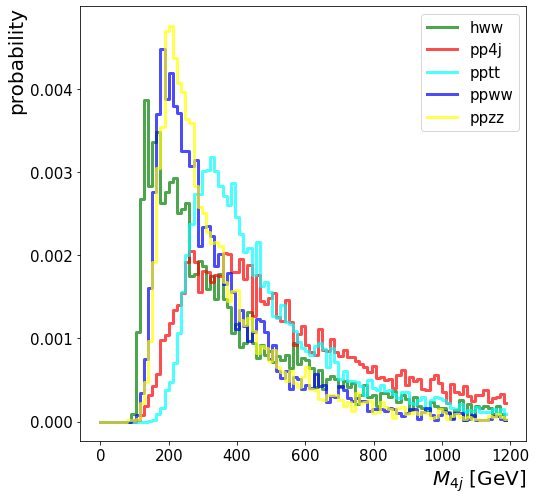

In [54]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,1200,100)

color_list = ["green","red","cyan","blue","yellow"]

for i in range(len(list)):
    hist_ggh, bins_ggh = np.histogram(dict_M_4j[list[i]] , bins=bin_size,density=True)
    print(color_list[i])
    plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = color_list[i], where='mid',linewidth=3, alpha=0.7,label=list[i]) 

# plt.yscale('log') 
plt.xlabel("$M_{4j}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

green
red
cyan
blue
yellow


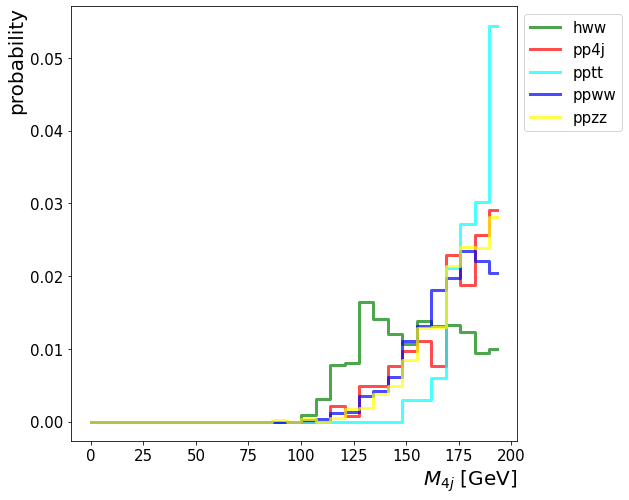

In [55]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,200,30)

color_list = ["green","red","cyan","blue","yellow"]

for i in range(len(list)):
    hist_ggh, bins_ggh = np.histogram(dict_M_4j[list[i]] , bins=bin_size,density=True)
    print(color_list[i])
    plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = color_list[i], where='mid',linewidth=3, alpha=0.7,label=list[i]) 

# plt.yscale('log') 
plt.xlabel("$M_{4j}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

green
red
cyan
blue
yellow


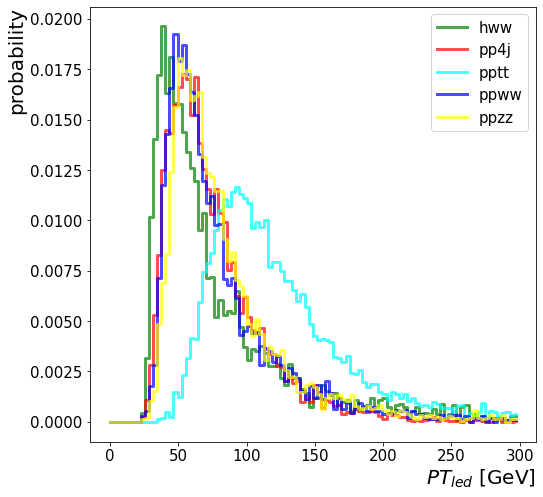

In [60]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,300,101)

color_list = ["green","red","cyan","blue","yellow"]

for i in range(len(list)):
    hist_ggh, bins_ggh = np.histogram(dict_PT_led[list[i]] , bins=bin_size,density=True)
    print(color_list[i])
    plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = color_list[i], where='mid',linewidth=3, alpha=0.7,label=list[i]) 

# plt.yscale('log') 
plt.xlabel("$PT_{led}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

green
red
cyan
blue
yellow


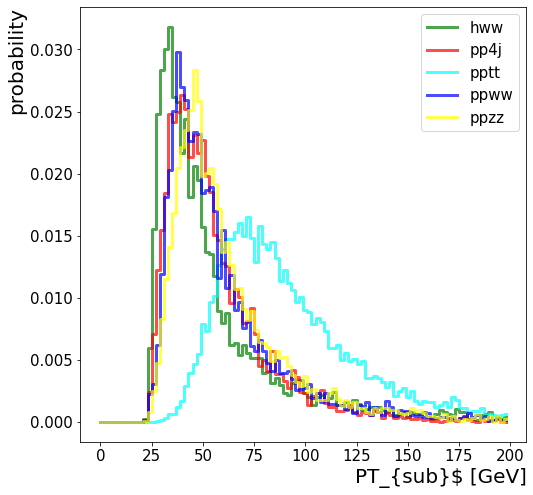

In [62]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,200,101)

color_list = ["green","red","cyan","blue","yellow"]

for i in range(len(list)):
    hist_ggh, bins_ggh = np.histogram(dict_PT_sub[list[i]] , bins=bin_size,density=True)
    print(color_list[i])
    plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = color_list[i], where='mid',linewidth=3, alpha=0.7,label=list[i]) 

# plt.yscale('log') 
plt.xlabel("PT_{sub}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()